# Perceptron implemented in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

## Perceptron algrithm

In [2]:
class Perceptron():
    def __init__(self):
        pass
    
    def train(self, X, y, rate = 0.01, niter = 100):
        n_samples, n_features = X.shape
        
        self.weight = np.zeros((n_features, 1)) # weights
        self.bias = 0 # bias
        
        for i in range(niter):
            # Step 1: Compute the activation
            a = np.dot(X, self.weight) + self.bias
            
            # Step 2: Compute the output
            y_predict = self.step_function(a)
            
            # Step 3: Compute the weight updates
            delta_w = rate * np.dot(X.T, (y - y_predict))
            delta_b = rate * np.sum(y - y_predict)
            
            # Step 4: Update the parameters
            self.weight += delta_w
            self.bias += delta_b
            
        return self.weight, self.bias
    
    def step_function(self, X):
        return np.array([1 if elem >= 0 else -1 for elem in X])[:, np.newaxis]
    
    def predict(self, X):
        a = np.dot(X, self.weight) + self.bias
        return self.step_function(a)

## Dataset 1

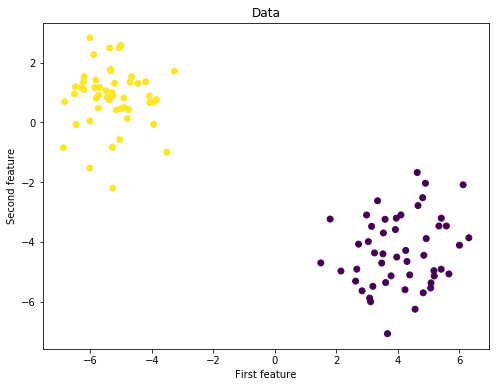

In [3]:
X, y = make_blobs(n_samples = 100, centers = 2)
y = y * 2 - 1 # Perceptron-style class encoding
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (75, 2)
Shape of X_test: (25, 2)
Shape of y_train: (75, 1)
Shape of y_test: (25, 1)


In [5]:
p = Perceptron()

w_trained, b_trained = p.train(X_train, y_train, rate = 0.05, niter = 500)

In [6]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"Training accuracy: {100 - np.mean(0.5 * np.abs(y_p_train - y_train)) * 100}%")
print(f"Testing accuracy: {100 - np.mean(0.5 * np.abs(y_p_test - y_test)) * 100}%")

Training accuracy: 100.0%
Testing accuracy: 100.0%


## Plot

In [7]:
def plot_hyperplane(X, y, weight, bias):
    slope = - weight[0]/weight[1]
    intercept = - bias/weight[1]
    x_hyperplane = np.linspace(-6,6,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Data and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

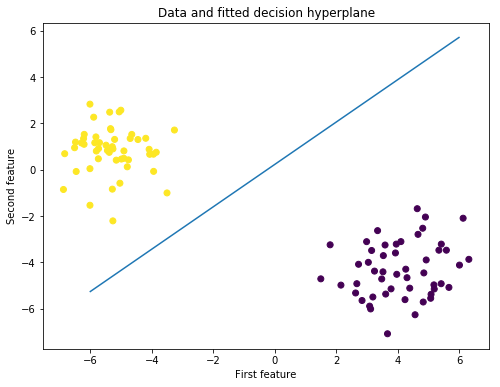

In [8]:
plot_hyperplane(X, y, w_trained, b_trained)

## Dataset 2

In [9]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [10]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.iloc[145:150, 0:5]

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
# Extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [13]:
y = np.where(y == 'Iris-setosa', -1, 1) # Perceptron-style label encoding
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

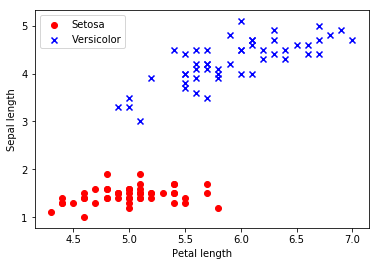

In [15]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.legend(loc = 'upper left')
plt.show()

In [16]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)

In [17]:
p = Perceptron()

w_trained, b_trained = p.train(X_train, y_train, rate = 0.05, niter = 1000)

In [18]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"Training accuracy: {100 - np.mean(0.5 * np.abs(y_p_train - y_train)) * 100}%")
print(f"Testing accuracy: {100 - np.mean(0.5 * np.abs(y_p_test - y_test)) * 100}%")

Training accuracy: 100.0%
Testing accuracy: 100.0%


## Plot

In [19]:
def plot_hyperplane_2(X, y, weight, bias):
    slope = - weight[0]/weight[1]
    intercept = - bias/weight[1]
    x_hyperplane = np.linspace(4,7,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'Versicolor')
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Data and fitted decision hyperplane")
    plt.xlabel("Petal length")
    plt.ylabel("Sepal length")
    plt.legend(loc = 'upper left')
    plt.show()

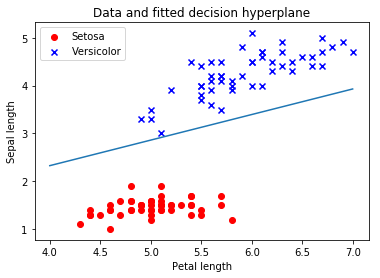

In [20]:
plot_hyperplane_2(X, y, w_trained, b_trained)